# Linear Regression Using Least Squares

##### (Notebook By Itay Hazan)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
a = np.ones((5,5))
b = np.arange(5)
a*b

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

## Step 1: Linear regression in $\mathbb R^2$

Suppose God's function is $f(x) = 3x + 4$. 

We, of course, do not know the coefficients 3 and 4 (we do, but for the sake of our gedankenexperiment, suppose we don't). Nevertheless, we are able to sample from God's function. However, every sample comes with some normally-distributed noise $e_i \sim \mathcal N(0,2^2)$.

The following code generates some noisy samples from God's distribution:

In [2]:
def generate_2d_points(num_points=30, slope=3, intersection=4, noise_sd=2):
    X = np.random.rand(num_points) * 10 - 5 # sampling points between -5 and 5
    y = 3 * X + 4 + noise_sd * np.random.randn(num_points)
    
    return X, y

Generate the points:

In [3]:
X, y = generate_2d_points()

Plot the points:

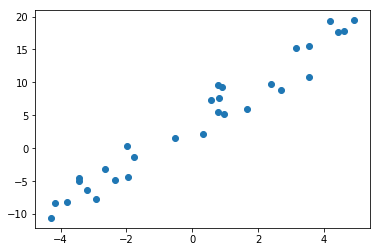

In [4]:
plt.figure()
plt.scatter(X,y)

From now on, we pretend to forget that God's coefficients are $(a,b)=(3,4), and try to estimate them ourselves.

Use the equation presented in the slides in order to find estimates $(\tilde a, \tilde b)$ to (a,b) that minimize the MSE (mean squared error).

In [21]:
Xtilda = np.c_[X, np.ones(X.shape[0])]
np.linalg.inv((np.transpose(Xtilda) @ Xtilda)) @ (np.transpose(Xtilda) @ y)

array([3.04719077, 3.7821214 ])

Plot the points, God's original function, and our linear regression estimate in the same plot. Add a legend.

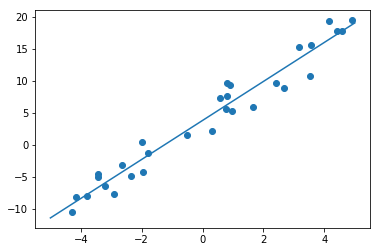

In [23]:
plt.figure()
plt.scatter(X,y)
x1, x2 = -5, 5
y1, y2 = 3.04719077 * -5 + 3.7821214 , 3.04719077 * 5 + 3.7821214
plt.plot([x1, x2], [y1,y2])

Try to change the number of points we sample from God's distribution, and repeat step 1. How does increasing the number of samples affect our estimate? How does decreasing it?

## Step 2: Linear Regression in $\mathbb R ^3$

Now, we assume that God has a function of the form $f(x_1, x_2) = a x_1 + b x_2 + c$. Suppose $(a,b,c) = (3,4,5)$.

Repeat step 1 above but for the new function $f$.

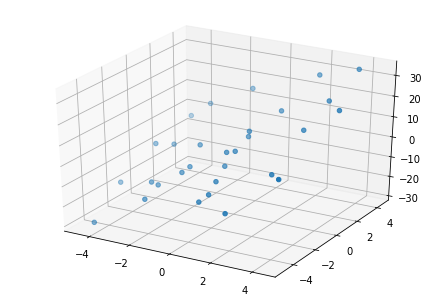

array([2.99322716, 3.86355677, 4.56128924])

In [32]:
# TODO: generate points with noise
def generate_3d_points(num_points=30, a=3, b=4, c=5, noise_sd=2):
    X1 = np.random.rand(num_points) * 10 - 5 # sampling points between -5 and 5
    X2 = np.random.rand(num_points) * 10 - 5 # sampling points between -5 and 5
    y = a * X1 + b * X2 + c + noise_sd * np.random.randn(num_points)
    
    return X1, X2, y

# TODO: plot the points
from mpl_toolkits.mplot3d import Axes3D
X1, X2, y = generate_3d_points()
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1, X2, y)
plt.show()

# TODO: estimate a,b,c and print your estimates
Xtilda = np.c_[X1[:], X2[:], np.ones(30)]
np.linalg.inv((np.transpose(Xtilda) @ Xtilda)) @ (np.transpose(Xtilda) @ y)
# TODO: plot the points, God's function, and our estimate in the same plot


## Step 3 (optional): Linear Regression in $\mathbb R^d$

Let $d \in \mathbb N$ be some parameter.

Assume God has a function of the form $f(x) = w^T x + b$, where $w,x \in \mathbb R^d$ and $b \in \mathbb R$. Suppose $w = (1,2,\dots,d)^T$ and $b = d+1$.

Repeat step 1 above, but now with our multivariate $f$. Since $f$ is high-dimensional, we will not be able to plot it, so you may skip the visualization parts.

In [58]:
# TODO: generate points with noise
def generate_nd_points(num_points=30, noise_sd=2, d=5):
    X = np.zeros([num_points, d])
    y = d + 1
    X = np.random.random((num_points, d)) * 10 - 5
    y = np.arange(d)+1
    y = (X*y).sum(axis=0)
    return X,y

# TODO: estimate w and b
X, y = generate_nd_points()
print(X.shape)
print(y.shape)
Xtilda = np.c_[X, np.ones(30)]
print(Xtilda.shape)
np.linalg.inv((np.transpose(Xtilda) @ Xtilda)) @ (np.transpose(Xtilda) @ y)
# TODO: print your estimates and compare them with God's coefficients


(30, 5)
(5,)
(30, 6)


ValueError: shapes (6,30) and (5,) not aligned: 30 (dim 1) != 5 (dim 0)